# **Model Evaluation and Feature Importance Analysis** 🚀

In this notebook, we will evaluate the performance of our Random Forest model used to predict **Hapiness Score**. Our focus will be on analyzing key metrics that reflect the model's accuracy and effectiveness. 📊

## **Objectives**:
1. **Model Performance Metrics**: We will calculate and discuss various metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R²) to assess how well the model fits the data. 📈
2. **Residual Analysis**: We will visualize the residuals to check for patterns that might indicate areas for model improvement. 🔍
3. **Prediction Visualization**: We will also present graphs comparing actual versus predicted values to visually assess the model's performance. 📉
4. **Feature Importance**: Finally, we will analyze and visualize the importance of different features in our model, helping us understand which factors are most influential in our predictions. 💡

This analysis will provide insights into the strengths and weaknesses of our model, guiding future enhancements and feature selection strategies. 🌟

Let’s dive in! 💪


---

Import the libraries:

In [11]:
import sys
import os
from dotenv import load_dotenv
from database.db_utils import build_engine
from sqlalchemy.orm import sessionmaker, declarative_base, aliased
from database.model import CountryData
import joblib
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np


In this section, we load the environment variables from a .env file and configure the working directory:

In [4]:
load_dotenv()

work_dir = os.getenv('WORK_DIR')

sys.path.append(work_dir)

print('Workdir: ', work_dir)

Workdir:  /home/carol/Escritorio/workshop-03


We will create the database engine and configure a session to interact with it:

In [5]:
engine = build_engine()
Session = sessionmaker(bind=engine)
session = Session()


Successfully connected to the database workshop3!


Next up, we're going to set up the base and run a query to get the data we need:

In [6]:
base = declarative_base()
table = aliased(CountryData)
query = session.query(table).statement
df = pd.read_sql(query, engine)

We have **235 rows** and **19 columns**

In [7]:
df.shape

(235, 19)

Let's take a look at how our Dataframe is structured:

In [9]:
df.head()

,id,Healthy_life_expectancy,Social_support,Economy,Generosity,Year,Freedom_to_make_life_choices,Perceptions_of_corruption,Region_Central_and_Eastern_Europe,Region_Eastern_Asia,Region_Latin_America_and_Caribbean,Region_Middle_East_and_Northern_Africa,Region_North_America,Region_Southeastern_Asia,Region_Southern_Asia,Region_Sub_Saharan_Africa,Region_Western_Europe,score,score_predicted
0,68,0.61766,1.07772,0.93929,0.07822,2015,0.28579,0.17383,False,False,False,True,False,False,False,False,False,5.605,5.069420
1,596,0.39100,0.95000,0.30800,0.22000,2018,0.45200,0.14600,False,False,False,False,False,False,False,True,False,4.350,4.281363
2,588,0.36500,1.28100,0.87400,0.05100,2018,0.51900,0.06400,False,False,False,False,False,False,False,True,False,4.441,4.355090
3,544,0.42400,0.81000,0.65200,0.21600,2018,0.33400,0.11300,False,False,False,False,False,False,True,False,False,5.472,4.573898
4,646,0.82500,1.31000,1.50300,0.26200,2019,0.59800,0.18200,False,False,False,True,False,False,False,False,False,6.825,6.897595


Now, let's calculate some common metrics to evaluate our model's performance:

In [12]:
mse = mean_squared_error(df['score'], df['score_predicted'])
rmse = np.sqrt(mse)
mae = mean_absolute_error(df['score'], df['score_predicted'])
r2 = r2_score(df['score'], df['score_predicted'])

print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')
print(f'R²: {r2}')

MSE: 0.188065615239514
RMSE: 0.43366532630533655
MAE: 0.33215879893899297
R²: 0.8493898132889055


- The evaluation metrics indicate that the model performs well: with a **Mean Squared Error (MSE)** of **0.188**, it suggests a low average squared difference between predictions and actual values, while the **Root Mean Squared Error (RMSE)** of **0.434** indicates that predictions are, on average, **0.434 units** away from actual values. The **Mean Absolute Error (MAE)** of **0.332** shows an average absolute deviation of **0.332 units**, which is more interpretable. Additionally, the **R² value** of **0.849** indicates that approximately **84.9%** of the variance in the target variable can be explained by the model, suggesting a strong relationship between the independent and dependent variables. Overall, these metrics reflect a good fit and reasonable accuracy of the model's predictions.


Let’s create a scatter plot to compare the actual scores with the predicted scores:

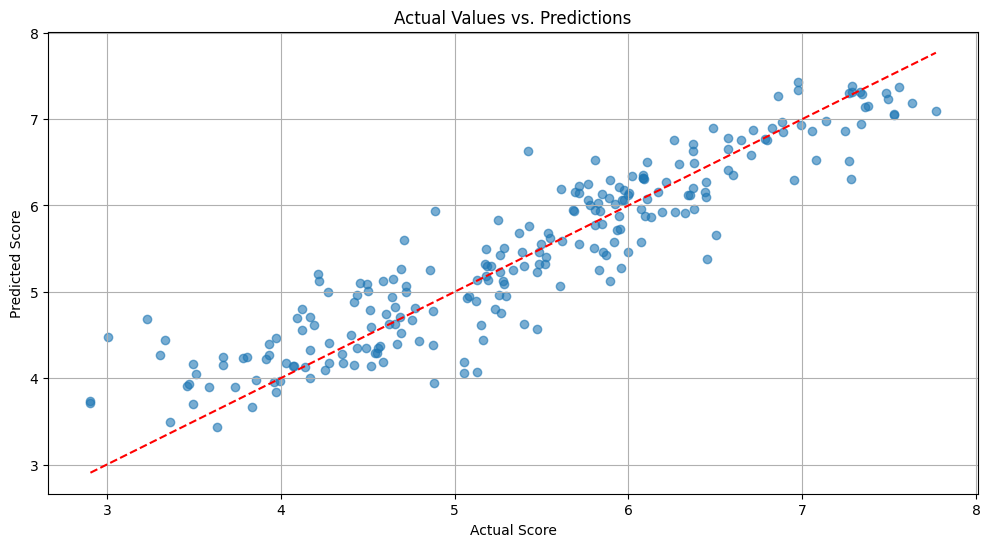

In [15]:
plt.figure(figsize=(12, 6))
plt.scatter(df['score'], df['score_predicted'], alpha=0.6)
plt.plot([df['score'].min(), df['score'].max()], 
         [df['score'].min(), df['score'].max()], 
         color='red', linestyle='--')  # reference line
plt.title('Actual Values vs. Predictions')
plt.xlabel('Actual Score')
plt.ylabel('Predicted Score')
plt.grid()
plt.show()

- We can conclude that the prediction model used demonstrates good overall performance. However, there is still room for improvement

Next, we’ll create a histogram to visualize the distribution of the errors (residuals) between the actual and predicted scores:

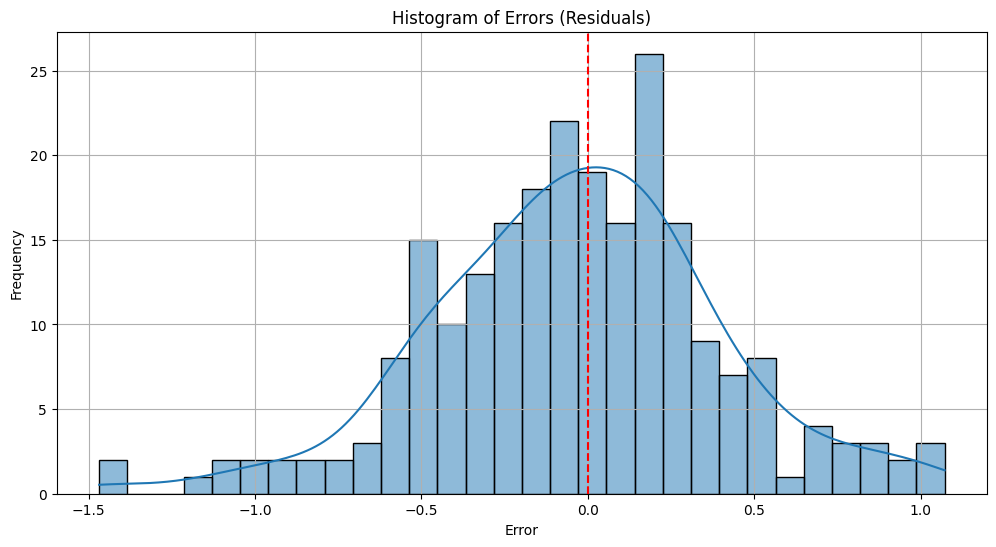

In [19]:
residuals = df['score'] - df['score_predicted']

plt.figure(figsize=(12, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Errors (Residuals)')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--') 
plt.grid()
plt.show()

- The **residuals** represent the difference between **observed values** and those predicted by the model. The **dotted red line** in the center marks the **zero error value**, indicating where the model would predict perfectly. The overlaid **density curve** suggests that the residuals are approximately **normally distributed**, with a slight **right skew**. This implies that the model is quite accurate, but there are some **outliers**, possibly due to **underestimations** or **overestimations** in predictions.


Let’s visualize the distributions of the actual and predicted scores using overlapping histograms:


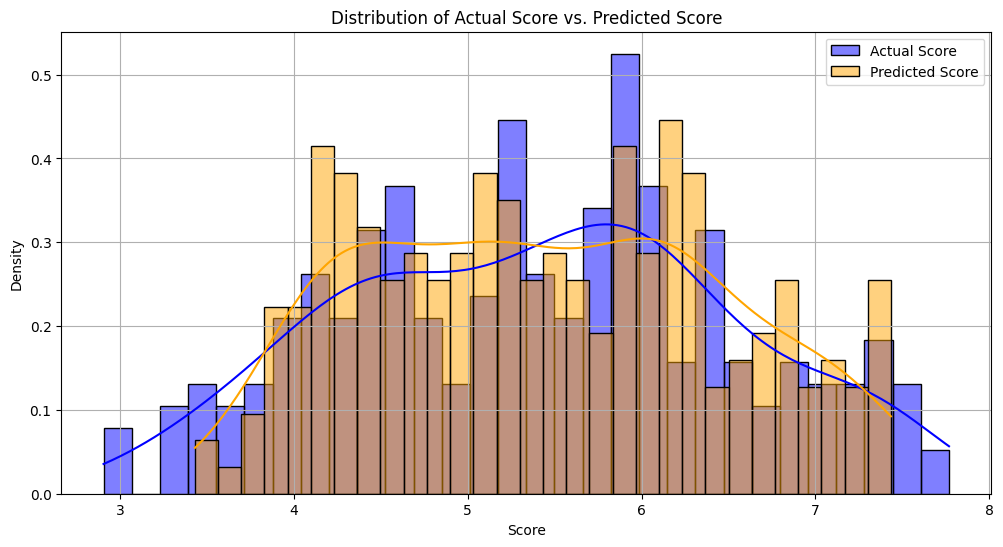

In [25]:
plt.figure(figsize=(12, 6))
sns.histplot(df['score'], bins=30, color='blue', label='Actual Score', kde=True, stat='density', alpha=0.5)
sns.histplot(df['score_predicted'], bins=30, color='orange', label='Predicted Score', kde=True, stat='density', alpha=0.5)
plt.title('Distribution of Actual Score vs. Predicted Score')
plt.xlabel('Score')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

- Both distributions exhibit a similar shape, suggesting that the prediction model captures the central tendency of the actual data. However, there are some differences in the peaks and dispersion, indicating variations in how well the model fits certain aspects of the data.

Now, let's visualize the predicted scores against the actual scores over the dataset:


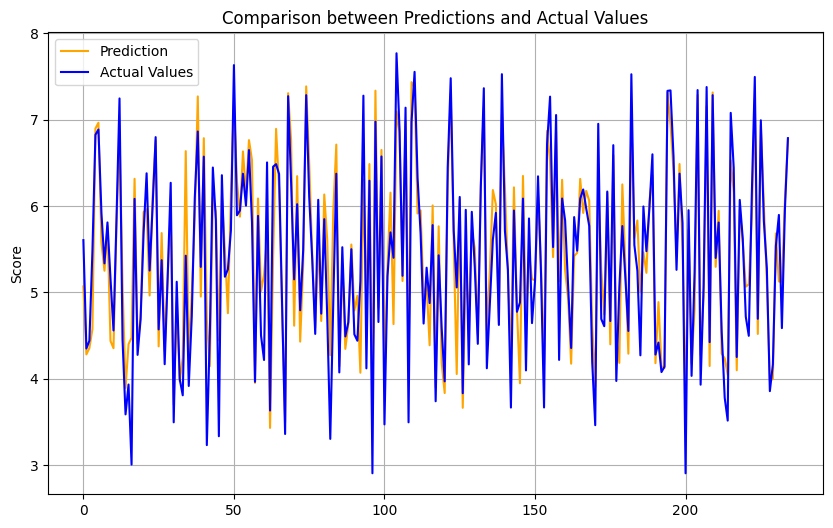

In [26]:
y_pred = df['score_predicted']
y_true = df['score']

plt.figure(figsize=(10, 6))

plt.plot(y_pred, label='Prediction', color='orange')
plt.plot(y_true.values, label='Actual Values', color='blue')
plt.ylabel('Score')
plt.title('Comparison between Predictions and Actual Values')
plt.legend()
plt.grid()
plt.show()

- Here, we can provide a more detailed comparison of our predictions to the actual values.

We’ll load our best Random Forest model and visualize the top features that contribute to predictions:

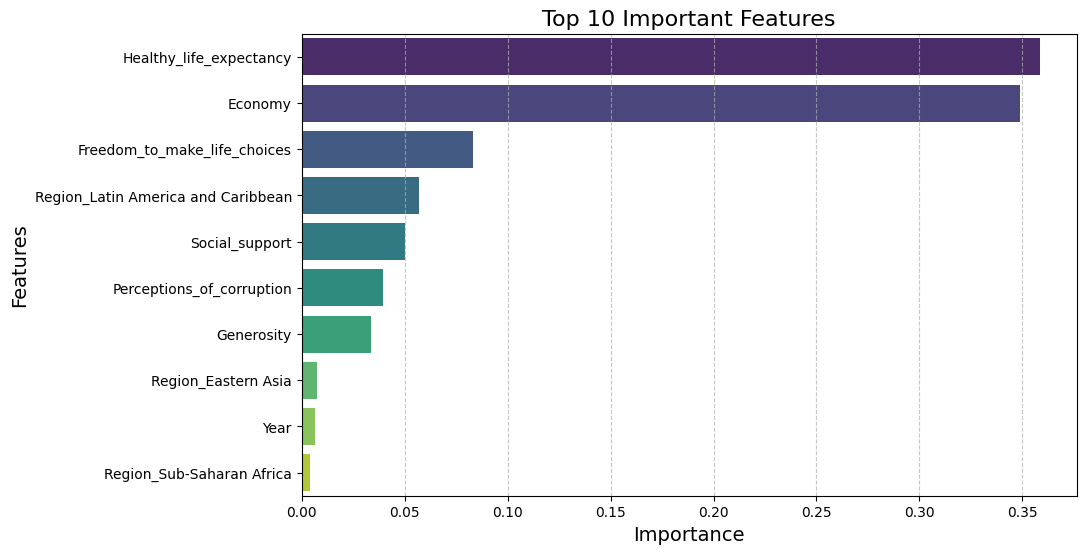

In [64]:
best_model = joblib.load('../models/best_model_Random_forest.pkl')

num_cols = ['Healthy_life_expectancy', 'Social_support', 'Economy', 'Generosity',
       'Year', 'Freedom_to_make_life_choices', 'Perceptions_of_corruption',
       'Region_Central and Eastern Europe', 'Region_Eastern Asia',
       'Region_Latin America and Caribbean',
       'Region_Middle East and Northern Africa', 'Region_North America',
       'Region_Southeastern Asia', 'Region_Southern Asia',
       'Region_Sub-Saharan Africa', 'Region_Western Europe']

importances = best_model.feature_importances_
feature_names = [col for col in num_cols if col != 'Score'] 

importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10), palette='viridis', dodge=False, hue='Feature', legend=False)
plt.title('Top 10 Important Features', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()



- The analysis of the top 10 most important features reveals that **healthy life expectancy** (**0.3584**) and **economy** (**0.3486**) are the most influential factors on the **happiness score**. **Freedom to make choices** (**0.0832**) is also significant, though less so than the first two. Regional contexts, such as **Latin America and the Caribbean** (**0.0572**) and **East Asia** (**0.0076**), show a moderate impact. **Social support** (**0.0502**) and **perception of corruption** (**0.0394**) highlight the importance of interpersonal relationships and institutional trust. Finally, **generosity** (**0.0339**) and the **year** (**0.0065**) have a lesser effect compared to the other factors.